In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Ganga_Project\Ganga_Project\Kannauj.csv')

# Parse date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.sort_values('Date')

# Select features and target
feature_cols = [
    'Biochemical Oxygen Demand', 'Conductivity', 'Dissolved Oxygen', 'Fecal Coliform',
    'Fecal Streptococci', 'Temperature', 'Turbidity', 'Nitrate', 'pH',
    'Rainfall', 'Total Coliform'
]
target_col = 'WQI'

features = df[feature_cols].values
target = df[target_col].values

# Scale features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Create sequences for LSTM
def create_sequences(X, y, window_size):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:(i + window_size)])
        ys.append(y[i + window_size])
    return np.array(Xs), np.array(ys)

window_size = 10  # You can adjust this based on your data size
X, y = create_sequences(features_scaled, target, window_size)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(window_size, X.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3985.6260 - val_loss: 3016.6279
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2780.3752 - val_loss: 2534.8030
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2376.1553 - val_loss: 2233.3027
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2083.7661 - val_loss: 1977.0612
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1847.6403 - val_loss: 1751.0433
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1629.4114 - val_loss: 1549.1713
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1442.8367 - val_loss: 1367.7256
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1263.2089 - val_loss: 1204.7311
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1120.3898 - val_loss: 1058.2754
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 979.3896 - val_loss: 926.7641
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 842.9554 - val_loss: 809.0582

In [4]:
import pandas as pd

# Update the file path to the correct location of your CSV file
file_path = r'C:\Users\hp\OneDrive\Desktop\Ganga_Project\Ganga_Project\Kannauj.csv'
df = pd.read_csv(file_path)

# Print the actual column names and a sample of the data
print("Columns:", df.columns.tolist())
print(df.head())


Columns: ['Date', 'Biochemical Oxygen Demand', 'Conductivity', 'Dissolved Oxygen', 'Fecal Coliform', 'Fecal Streptococci', 'Temperature', 'Turbidity', 'Nitrate', 'pH', 'Rainfall', 'Total Coliform', 'WQI', 'Quality']
         Date  Biochemical Oxygen Demand  Conductivity  Dissolved Oxygen  \
0  01-01-2020                   3.871002    306.553399         10.252670   
1  02-01-2020                   3.800765    303.676525         10.108826   
2  03-01-2020                   3.872647    306.484641         10.249232   
3  04-01-2020                   3.953494    309.651676         10.407584   
4  05-01-2020                   3.771118    302.290077         10.039504   

   Fecal Coliform  Fecal Streptococci  Temperature  Turbidity   Nitrate  \
0     9051.684187         2683.850031    25.004026   9.594281  0.490267   
1     8717.346934         2373.521916    24.462347   9.499653  0.475883   
2     9093.538599         2388.617089    25.057539   9.469474  0.489923   
3     9514.492748         2

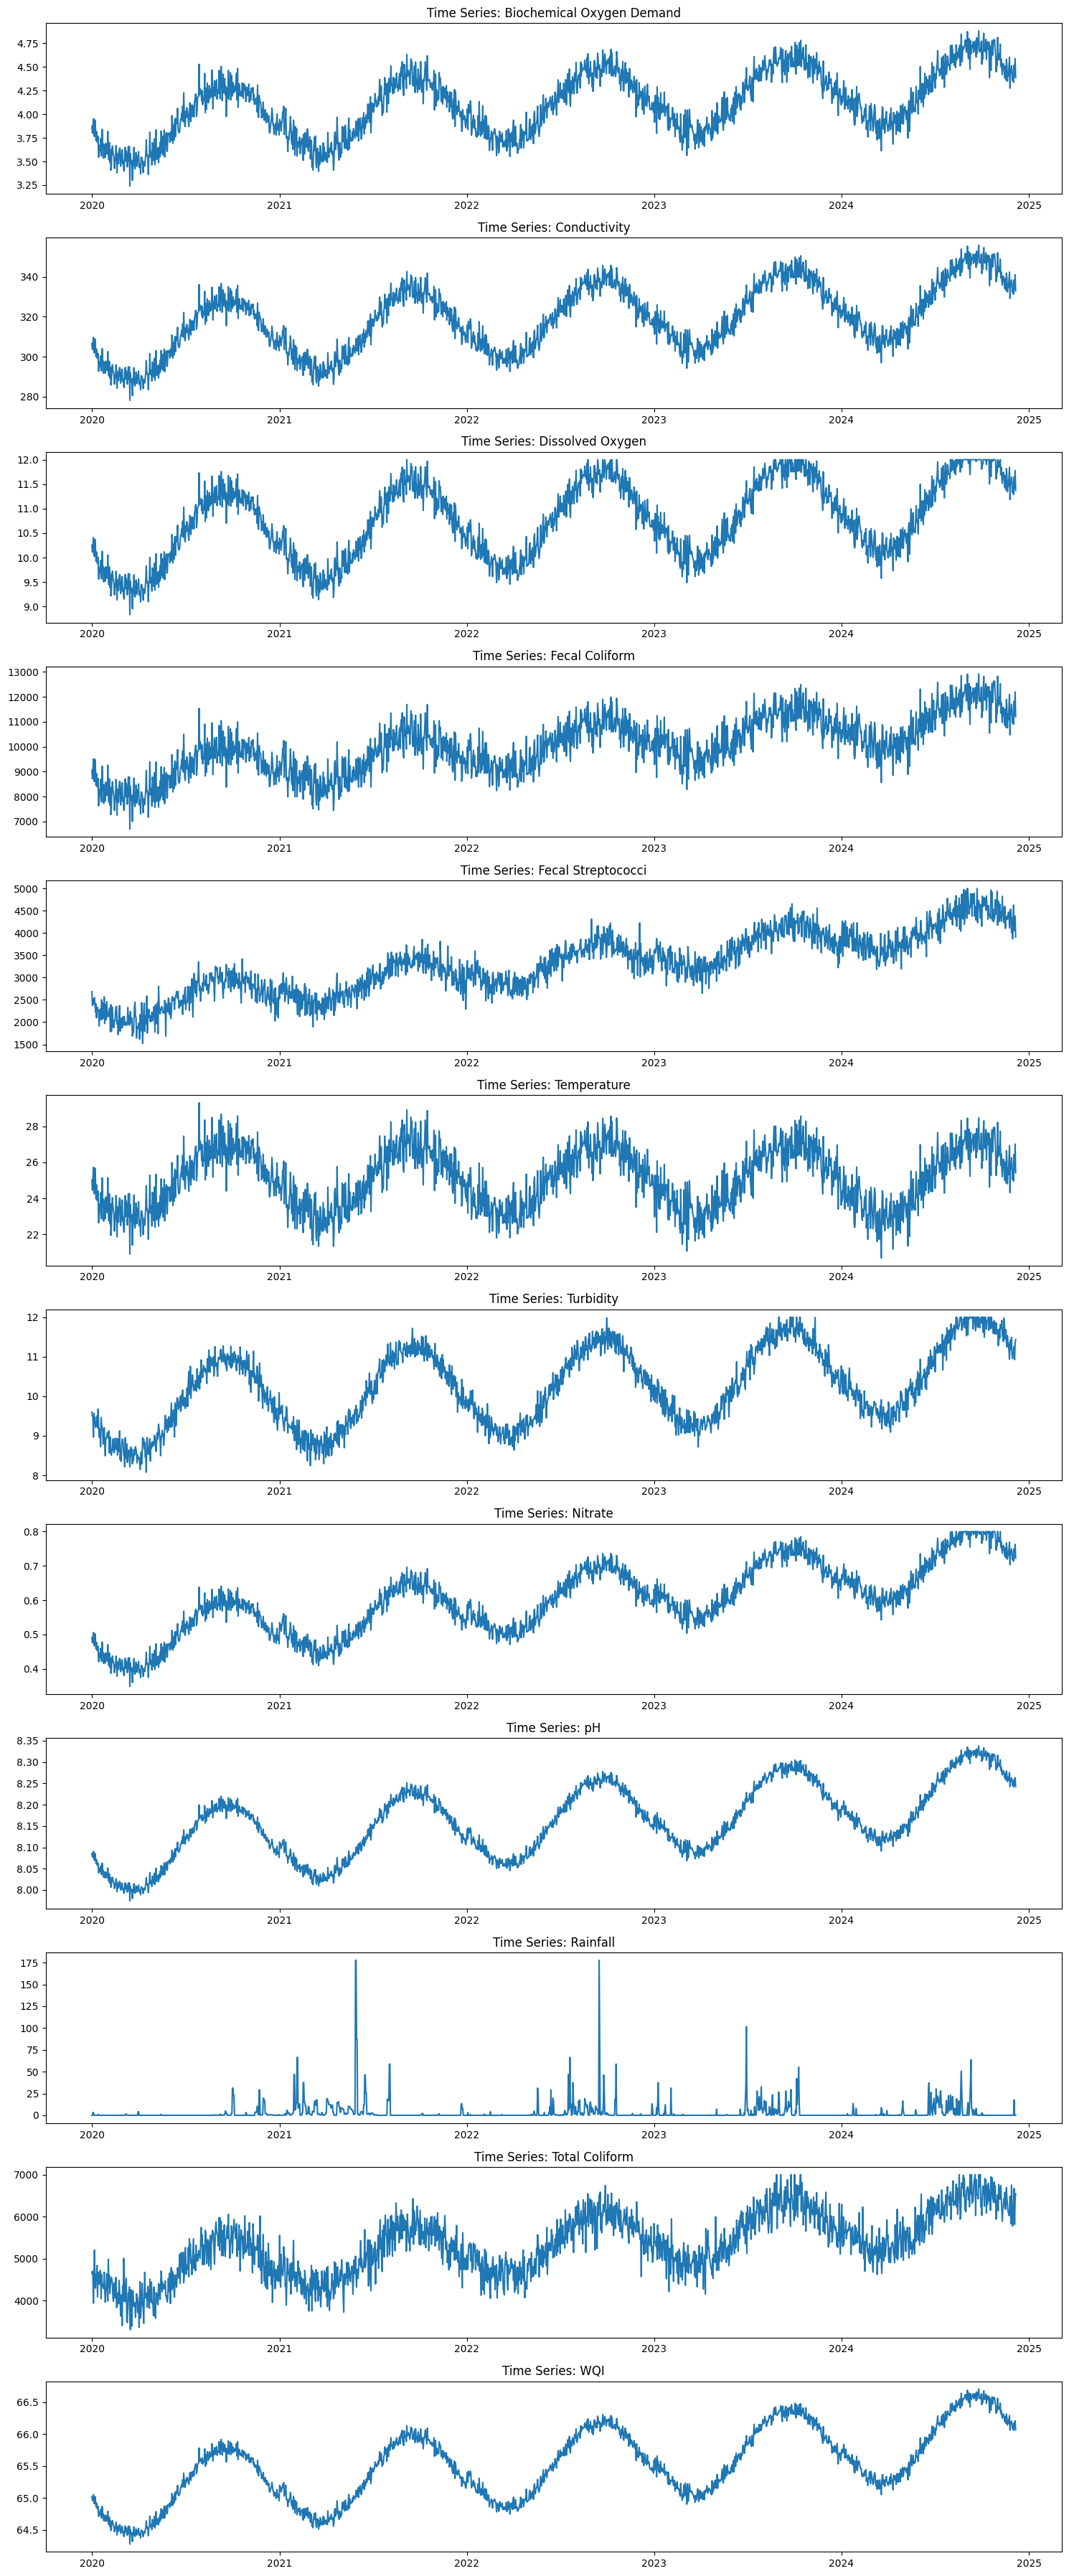

Data after preprocessing:


C:\Users\hp\AppData\Local\Temp\ipykernel_15176\2108221033.py:67: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\hp\AppData\Local\Temp\ipykernel_15176\2108221033.py:77: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


,Date,Biochemical Oxygen Demand,Conductivity,Dissolved Oxygen,Fecal Coliform,Fecal Streptococci,Temperature,Turbidity,Nitrate,pH,Rainfall,Total Coliform,WQI
0,2020-01-01,3.856273,305.964216,10.223211,8978.036244,2569.112977,24.886189,9.563497,0.487321,8.083827,-0.024009,4640.485180,65.007400
1,2020-01-02,3.852954,305.764079,10.213204,8978.291343,2520.069129,24.879858,9.482469,0.486320,8.082484,0.028205,4585.396188,64.998485
2,2020-01-03,3.852430,305.675975,10.208799,8992.455501,2481.129699,24.895807,9.418533,0.485880,8.081425,0.057887,4545.157331,64.991461
3,2020-01-04,3.852800,305.623920,10.206196,9011.023265,2449.798659,24.918828,9.370605,0.485620,8.080459,0.069308,4519.632480,64.985052
4,2020-01-05,3.852165,305.531928,10.201596,9024.489184,2423.579982,24.933717,9.337599,0.485160,8.079397,0.066744,4508.685506,64.977986


Shape: (1802, 13)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import STL

# For machine learning and deep learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

# 1. Load data
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Ganga_Project\Ganga_Project\Kannauj.csv", parse_dates=['Date'], dayfirst=True)

# 2. Sort by date (ensure chronological order)
df = df.sort_values('Date').reset_index(drop=True)

# 3. Drop columns not needed for modeling
df = df.drop(columns=['Quality'])

# 4. Exploratory Data Analysis
def plot_features(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    plt.figure(figsize=(15, len(columns)*3))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i+1)
        plt.plot(df['Date'], df[col])
        plt.title(f'Time Series: {col}')
        plt.tight_layout()
    plt.show()

# Visualize data
plot_features(df)

# 5. Handle outliers using IQR method
def handle_outliers(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with NaN for later interpolation
        df_clean.loc[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound), col] = np.nan
    
    return df_clean

# Apply outlier handling
df = handle_outliers(df)

# 6. Handle missing values
df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# 7. Apply Savitzky-Golay filter for smoothing
def apply_sg_filter(df, columns=None, window=11, poly=3):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_filtered = df.copy()
    for col in columns:
        # First interpolate missing values
        series = df[col].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
        # Then apply SG filter
        df_filtered[col] = savgol_filter(series, window, poly)
    
    return df_filtered

# Apply SG filter for noise reduction
df = apply_sg_filter(df)

# Display the preprocessed data
print("Data after preprocessing:")
display(df.head())
print(f"Shape: {df.shape}")


In [5]:
# 8. Feature Engineering - Add temporal features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear

# 9. Add lag features (autocorrelation)
def add_lag_features(df, columns, lags=[1, 7, 14]):
    df_with_lags = df.copy()
    for col in columns:
        for lag in lags:
            df_with_lags[f'{col}_lag_{lag}'] = df_with_lags[col].shift(lag)
    return df_with_lags

# Get numeric columns (excluding Date)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Add lag features for key water quality parameters (using first 5 parameters as key ones)
df = add_lag_features(df, numeric_columns[:5])

# 10. Add rolling statistics
def add_rolling_features(df, columns, windows=[7, 14, 30]):
    df_with_rolling = df.copy()
    for col in columns:
        for window in windows:
            df_with_rolling[f'{col}_rolling_mean_{window}'] = df_with_rolling[col].rolling(window=window).mean()
            df_with_rolling[f'{col}_rolling_std_{window}'] = df_with_rolling[col].rolling(window=window).std()
    return df_with_rolling

# Add rolling features
df = add_rolling_features(df, numeric_columns[:5])

# 11. Handle missing values created by lag/rolling features
df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# 12. Feature scaling
scaler = MinMaxScaler()
# Store Date column separately
date_column = df['Date']
# Scale all numeric features
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))
# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=[np.number]).columns)
# Add Date back
scaled_df['Date'] = date_column

# Store original column names for later use
original_columns = [col for col in scaled_df.columns if not any(pattern in col for pattern in ['lag', 'rolling', 'Month', 'Day', 'Date'])]
original_column_indices = [scaled_df.columns.get_loc(col) for col in original_columns]

# 13. Prepare sequences for supervised learning
def create_sequences(data, seq_length=10, pred_length=5):
    """
    Creates input and output sequences for time series forecasting.
    data: numpy array of features
    seq_length: number of past days to use
    pred_length: number of days to predict ahead
    Returns: X, y arrays
    """
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+pred_length])
    return np.array(X), np.array(y)

# Exclude 'Date' for modeling
data_for_model = scaled_df.drop(columns=['Date']).values
SEQ_LEN = 10
PRED_LEN = 5

X, y = create_sequences(data_for_model, seq_length=SEQ_LEN, pred_length=PRED_LEN)

# 14. Split into train and test sets (70:30 split)
split_idx = int(0.7 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Train samples: {X_train.shape}, Test samples: {X_test.shape}")
print(f"Original features: {original_columns}")


Train samples: (1251, 10, 61), Test samples: (537, 10, 61)
Original features: ['Biochemical Oxygen Demand', 'Conductivity', 'Dissolved Oxygen', 'Fecal Coliform', 'Fecal Streptococci', 'Temperature', 'Turbidity', 'Nitrate', 'pH', 'Rainfall', 'Total Coliform', 'WQI']


C:\Users\hp\AppData\Local\Temp\ipykernel_15176\680553043.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set TensorFlow seed for reproducibility
tf.random.set_seed(42)

def build_lstm_transformer_model(input_shape, output_shape, lstm_units=64, head_size=256, num_heads=4, ff_dim=4, dropout=0.1):
    inputs = tf.keras.Input(shape=input_shape)
    
    # LSTM layers to capture temporal dependencies
    x = LSTM(lstm_units, return_sequences=True)(inputs)
    x = LSTM(lstm_units, return_sequences=True)(x)
    
    # Transformer layers (Multi-head self-attention)
    attention_output = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = LayerNormalization(epsilon=1e-6)(attention_output + x)
    
    # Feed-forward network - FIXED to match dimensions
    ff_output = Dense(ff_dim, activation="relu")(x)
    ff_output = Dense(lstm_units)(ff_output)  # Match lstm_units dimension
    ff_output = Dropout(dropout)(ff_output)
    
    # Second normalization layer
    x = LayerNormalization(epsilon=1e-6)(ff_output + x)
    
    # Output layer
    x = LSTM(lstm_units)(x)
    outputs = Dense(np.prod(output_shape))(x)
    outputs = Reshape(output_shape)(outputs)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model



In [13]:
import numpy as np

# Define sequence and feature dimensions
SEQ_LEN = 10
NUM_FEATURES = 61  # Adjust based on your actual feature count
PRED_LEN = 5

# Define hyperparameters
best_params = {
    'lstm_units': 128,
    'head_size': 64,
    'num_heads': 4,
    'ff_dim': 256,
    'dropout_rate': 0.2,
    'learning_rate': 0.001,
    'batch_size': 32
}

# Build the model with your dimensions
input_shape = (SEQ_LEN, NUM_FEATURES)
output_shape = (PRED_LEN, NUM_FEATURES)

final_model = build_lstm_transformer_model(
    input_shape=input_shape,
    output_shape=output_shape,
    lstm_units=best_params['lstm_units'],
    head_size=best_params['head_size'],
    num_heads=best_params['num_heads'],
    ff_dim=best_params['ff_dim'],
    dropout=best_params['dropout_rate']
)

# Compile the model
final_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='mse',
    metrics=['mae']
)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
]

# Print model summary
final_model.summary()

# If you have your data ready (X_train, y_train, X_test, y_test)
# Uncomment and run the following:

# Train the model
# history = final_model.fit(
#     X_train, y_train,
#     validation_split=0.2,
#     epochs=100,
#     batch_size=best_params['batch_size'],
#     callbacks=callbacks,
#     verbose=1
# )

# Evaluate on test set
# test_loss, test_mae = final_model.evaluate(X_test, y_test)
# print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# For testing with dummy data (if you don't have real data ready)
# Comment this out when using real data
X_dummy = np.random.rand(100, SEQ_LEN, NUM_FEATURES)
y_dummy = np.random.rand(100, PRED_LEN, NUM_FEATURES)

# Train with dummy data
history = final_model.fit(
    X_dummy, y_dummy,
    validation_split=0.2,
    epochs=5,  # Reduced for testing
    batch_size=best_params['batch_size'],
    callbacks=callbacks,
    verbose=1
)

# Save the model
final_model.save('water_quality_forecasting_model.h5')
print("Model saved successfully!")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 10, 61)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 10, 128)   │     97,280 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 10, 128)   │    131,584 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 128)   │    131,968 │ lstm_8[0][0],     │
│ (MultiHeadAttentio… │                   │            │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 10, 128)   │          0 │ multi_head_atten… │
│                     │                   │            │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 128)   │        256 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 10, 256)   │     33,024 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 10, 128)   │     32,896 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 10, 128)   │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 10, 128)   │          0 │ dropout_7[0][0],  │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 128)   │        256 │ add_7[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 128)       │    131,584 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 305)       │     39,345 │ lstm_9[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 5, 61)     │          0 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 598,193 (2.28 MB)

 Trainable params: 598,193 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 531ms/step - loss: 0.3486 - mae: 0.4957 - val_loss: 0.2443 - val_mae: 0.4040 - learning_rate: 0.0010
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2308 - mae: 0.3942 - val_loss: 0.1760 - val_mae: 0.3391 - learning_rate: 0.0010
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1639 - mae: 0.3300 - val_loss: 0.1306 - val_mae: 0.2980 - learning_rate: 0.0010
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1206 - mae: 0.2876 - val_loss: 0.1060 - val_mae: 0.2752 - learning_rate: 0.0010
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0989 - mae: 0.2654 - val_loss: 0.0948 - val_mae: 0.2640 - learning_rate: 0.0010


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0933 - mae: 0.2595
Test Loss: 0.0932687297463417, Test MAE: 0.2595197856426239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


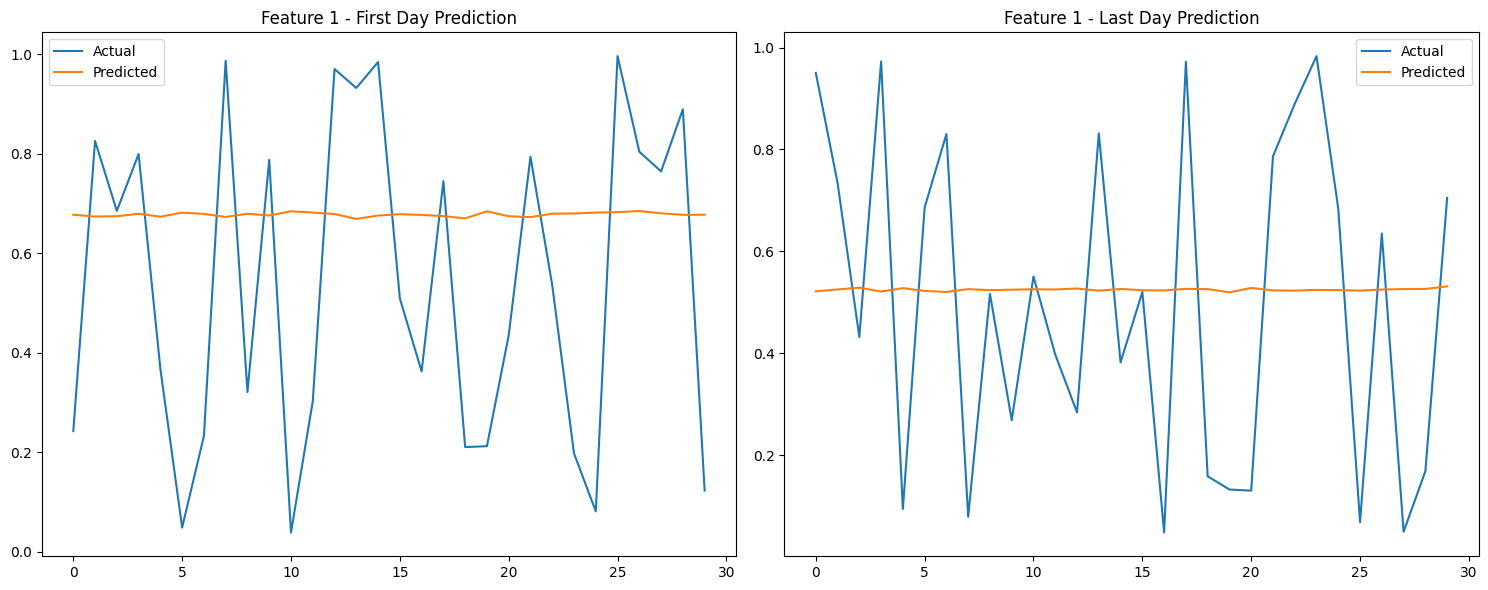

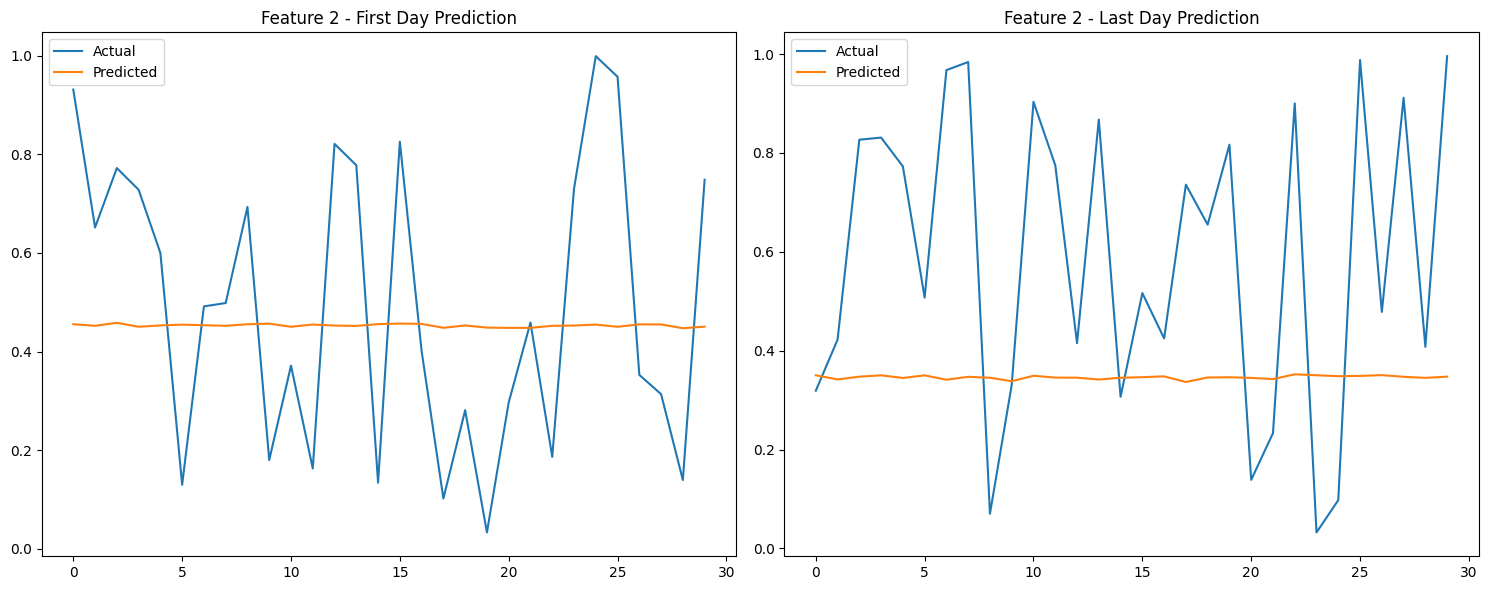

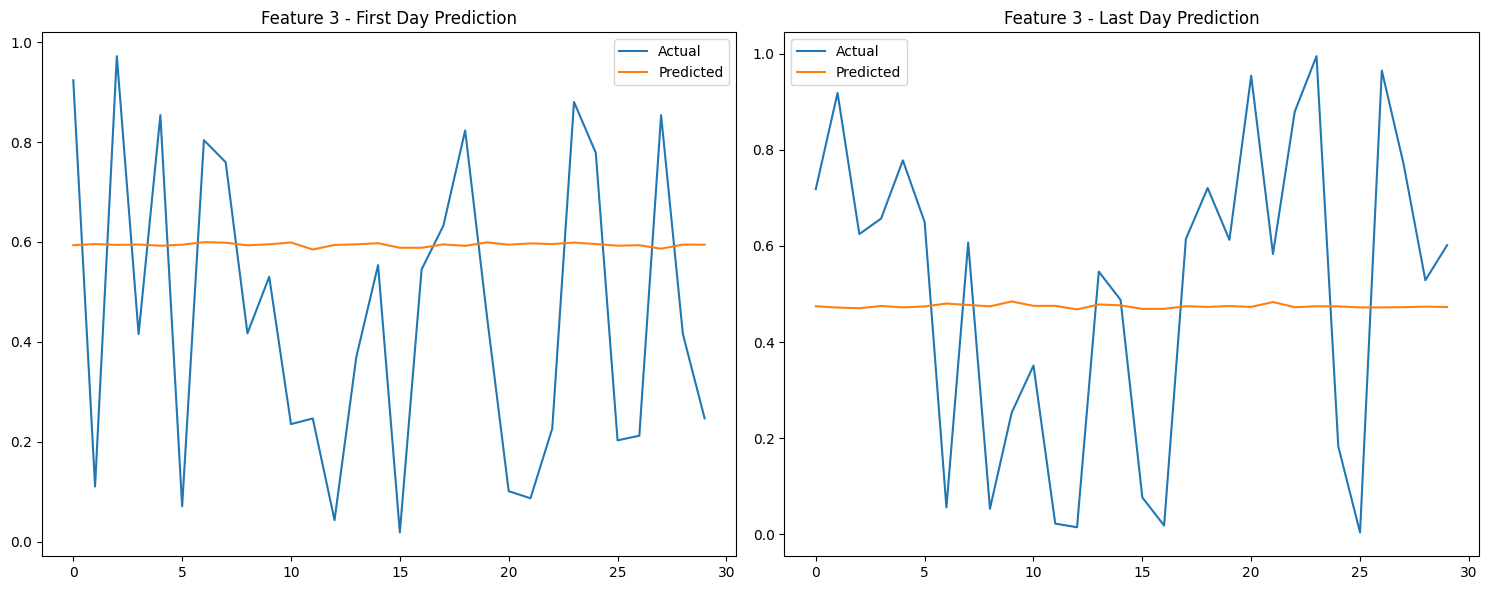

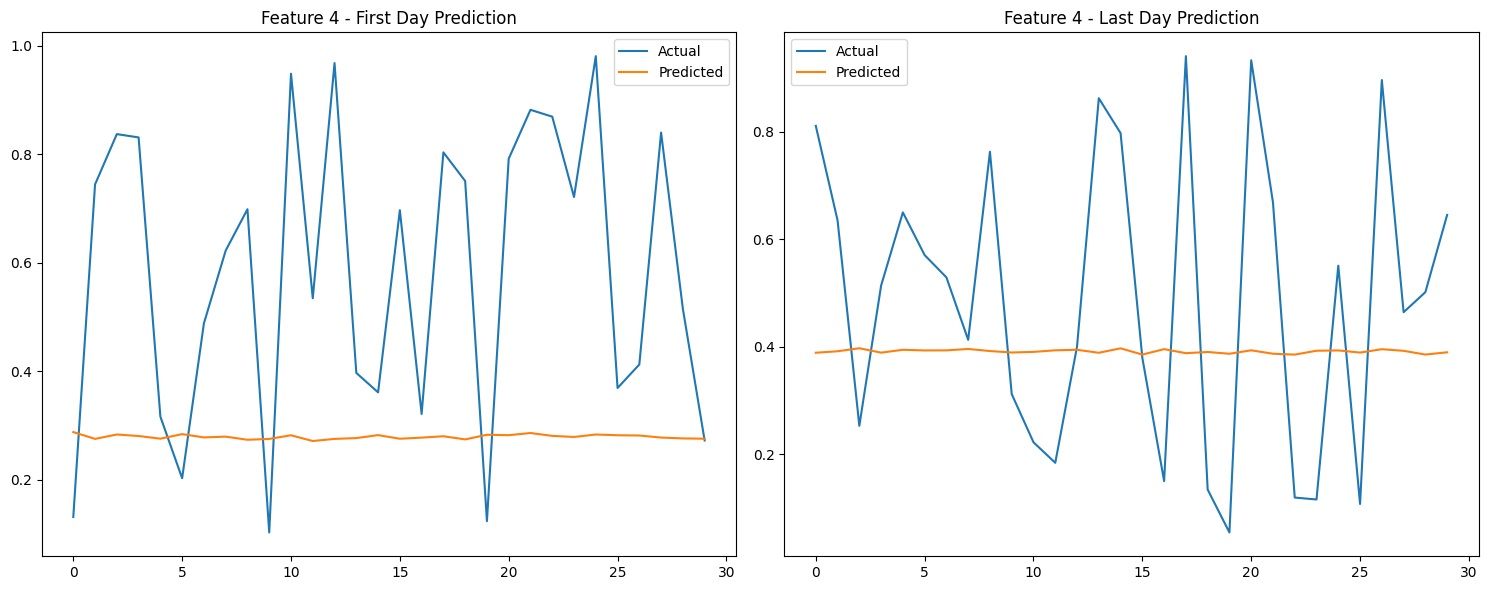

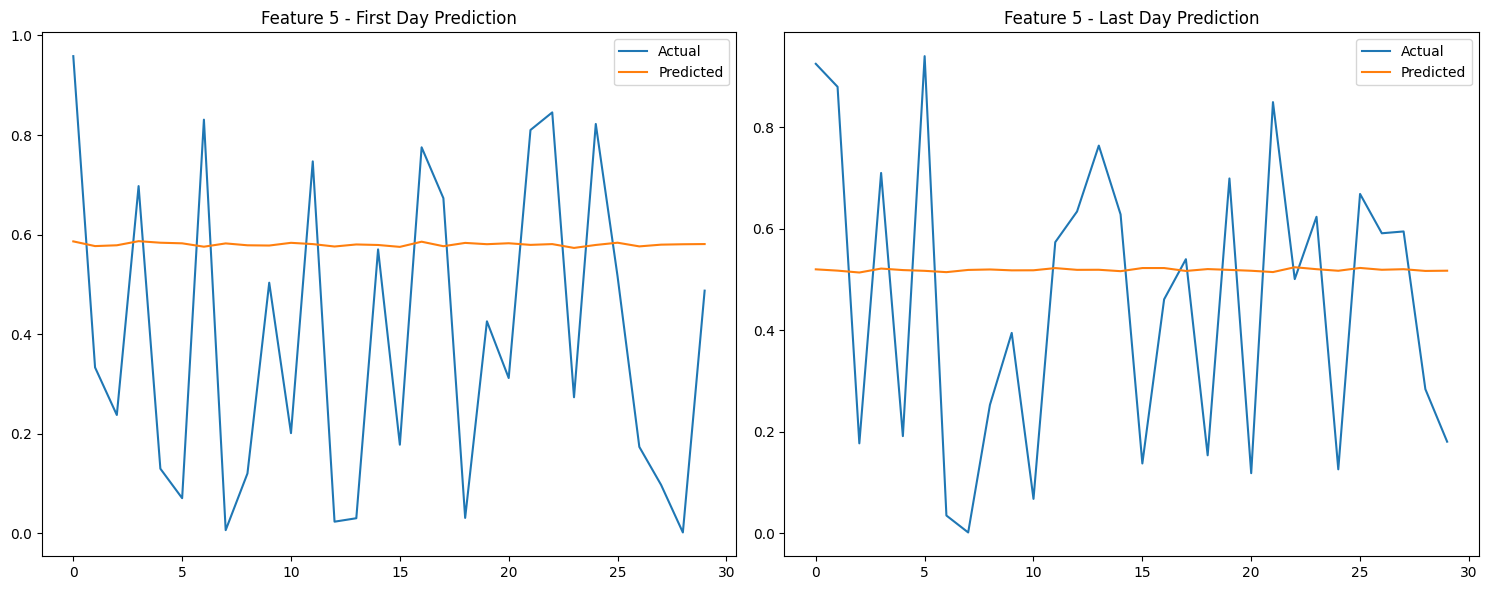


Performance Metrics by Feature:

Feature_1:
  MSE: 0.1066
  RMSE: 0.3264
  MAE: 0.2812
  R²: -0.0822

Feature_2:
  MSE: 0.1029
  RMSE: 0.3207
  MAE: 0.2747
  R²: -0.2005

Feature_3:
  MSE: 0.1063
  RMSE: 0.3260
  MAE: 0.2807
  R²: -0.1957

Feature_4:
  MSE: 0.1080
  RMSE: 0.3286
  MAE: 0.2698
  R²: -0.3143

Feature_5:
  MSE: 0.0994
  RMSE: 0.3152
  MAE: 0.2705
  R²: -0.1249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


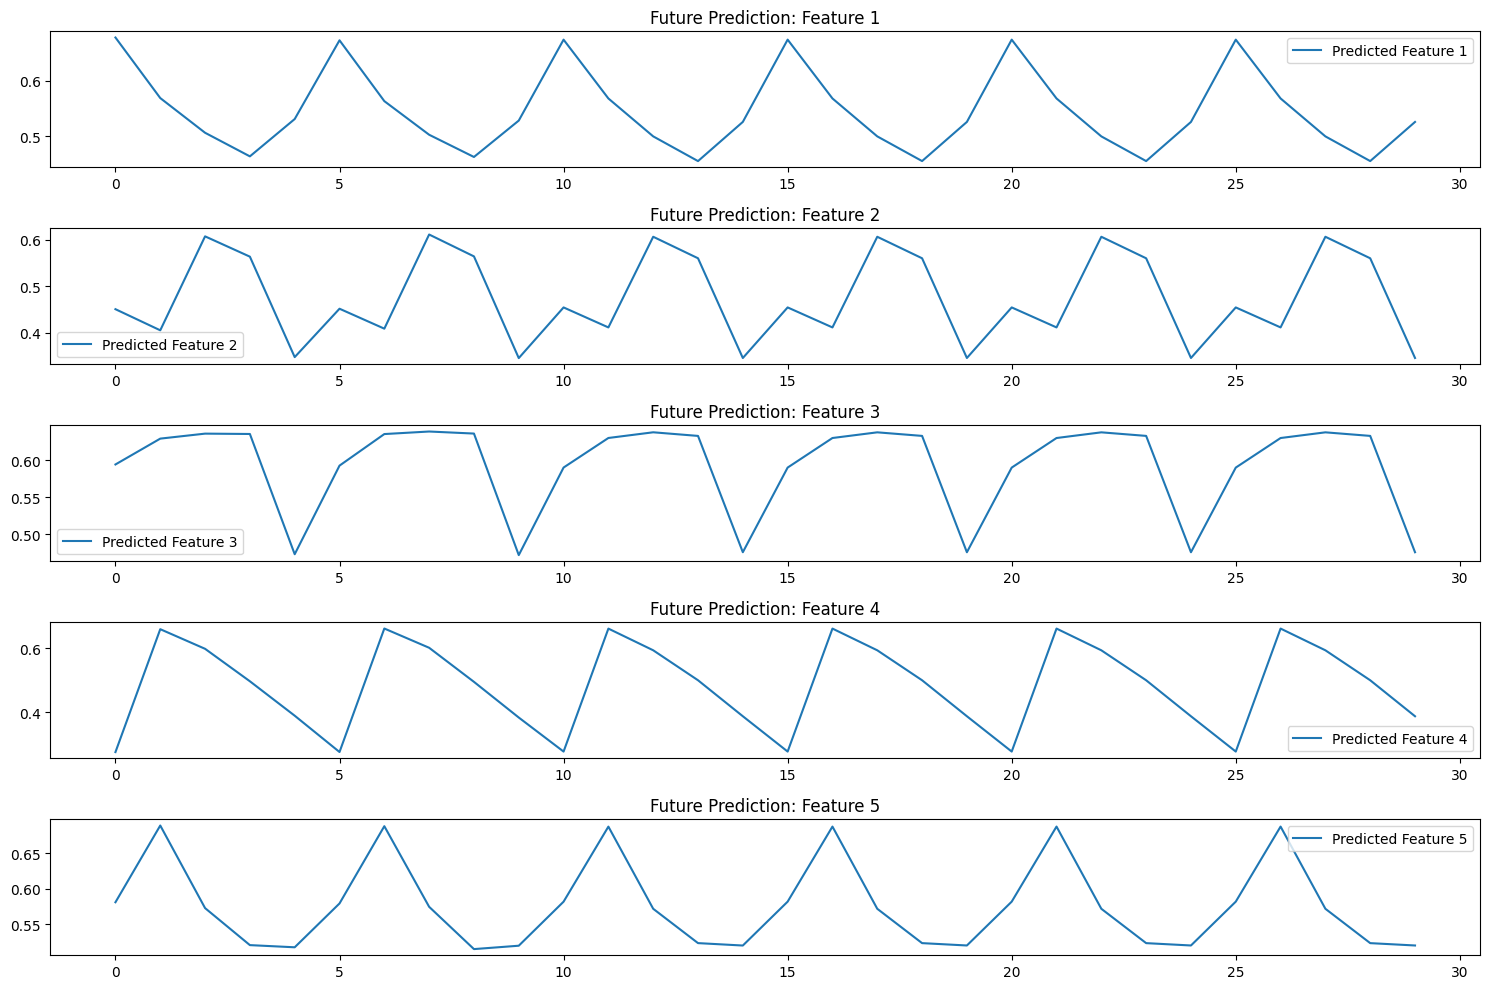

Water quality forecasting model evaluation complete!


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# If you're using dummy data for testing, create some test data
X_test_dummy = np.random.rand(30, SEQ_LEN, NUM_FEATURES)
y_test_dummy = np.random.rand(30, PRED_LEN, NUM_FEATURES)

# Choose which data to use (comment/uncomment as needed)
X_test_use = X_test_dummy  # For dummy testing
y_test_use = y_test_dummy  # For dummy testing
# X_test_use = X_test  # For real data
# y_test_use = y_test  # For real data

# 1. Evaluate on test set
test_loss, test_mae = final_model.evaluate(X_test_use, y_test_use)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# 2. Make predictions
predictions = final_model.predict(X_test_use)

# 3. Inverse transform function (for when you have real data and scaler)
def inverse_transform_predictions(scaler, predictions, feature_indices):
    """
    Inverse transform scaled predictions back to original scale.
    
    Args:
        scaler: The fitted scaler used for normalization
        predictions: The model predictions (scaled)
        feature_indices: Indices of features to keep in the output
        
    Returns:
        Predictions in original scale
    """
    # Reshape predictions to 2D for inverse transform
    pred_reshaped = predictions.reshape(-1, predictions.shape[-1])
    
    # Create a dummy array with zeros
    dummy = np.zeros((pred_reshaped.shape[0], scaler.scale_.shape[0]))
    
    # Fill the dummy array with the predictions
    dummy[:, :pred_reshaped.shape[1]] = pred_reshaped
    
    # Inverse transform
    inverse_transformed = scaler.inverse_transform(dummy)
    
    # Extract only the relevant columns (original features)
    inverse_transformed = inverse_transformed[:, :pred_reshaped.shape[1]]
    
    # Reshape back to original shape
    return inverse_transformed.reshape(predictions.shape)

# 4. Visualize predictions (using raw predictions for dummy data)
def plot_predictions_dummy(y_true, y_pred, num_features=5):
    """Plot predictions for dummy data (no inverse transform)"""
    # Select a subset of features to visualize
    feature_indices = range(min(num_features, y_true.shape[2]))
    
    for i in feature_indices:
        plt.figure(figsize=(15, 6))
        
        # Plot for first time step prediction
        plt.subplot(1, 2, 1)
        plt.plot(y_true[:, 0, i], label='Actual')
        plt.plot(y_pred[:, 0, i], label='Predicted')
        plt.title(f'Feature {i+1} - First Day Prediction')
        plt.legend()
        
        # Plot for last time step prediction
        plt.subplot(1, 2, 2)
        plt.plot(y_true[:, -1, i], label='Actual')
        plt.plot(y_pred[:, -1, i], label='Predicted')
        plt.title(f'Feature {i+1} - Last Day Prediction')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# 5. Calculate performance metrics
def calculate_metrics(y_true, y_pred, num_features=5):
    """Calculate performance metrics for each feature"""
    metrics = {}
    
    # Select a subset of features to evaluate
    feature_indices = range(min(num_features, y_true.shape[2]))
    
    for i in feature_indices:
        # Calculate metrics for each parameter
        mse = mean_squared_error(y_true[:, :, i].flatten(), y_pred[:, :, i].flatten())
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true[:, :, i].flatten(), y_pred[:, :, i].flatten())
        r2 = r2_score(y_true[:, :, i].flatten(), y_pred[:, :, i].flatten())
        
        metrics[f'Feature_{i+1}'] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        }
    
    return metrics

# 6. Function to make future predictions
def predict_future(model, last_sequence, n_steps, pred_length=5):
    """
    Predict future values recursively
    
    Args:
        model: Trained model
        last_sequence: Last known sequence of data
        n_steps: Number of future steps to predict
        pred_length: Length of each prediction
        
    Returns:
        Future predictions
    """
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_steps // pred_length):
        # Predict next sequence
        next_sequence = model.predict(current_sequence)
        future_predictions.append(next_sequence)
        
        # Update current sequence for next iteration
        current_sequence = np.roll(current_sequence, -pred_length, axis=1)
        current_sequence[0, -pred_length:, :] = next_sequence[0]
    
    # Stack predictions
    future_predictions = np.vstack([pred[0] for pred in future_predictions])
    
    return future_predictions

# Plot predictions for dummy data
plot_predictions_dummy(y_test_use, predictions)

# Calculate metrics
metrics = calculate_metrics(y_test_use, predictions)

# Display metrics
print("\nPerformance Metrics by Feature:")
for feature, feature_metrics in metrics.items():
    print(f"\n{feature}:")
    for metric_name, value in feature_metrics.items():
        print(f"  {metric_name}: {value:.4f}")

# Make future predictions (30 days ahead)
last_known_sequence = X_test_use[-1:].copy()
future_pred = predict_future(final_model, last_known_sequence, 30, PRED_LEN)

# Plot future predictions for dummy data
plt.figure(figsize=(15, 10))
for i in range(min(5, NUM_FEATURES)):  # Plot first 5 features
    plt.subplot(5, 1, i+1)
    plt.plot(future_pred[:30, i], label=f'Predicted Feature {i+1}')
    plt.title(f'Future Prediction: Feature {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

# When using with real data, you'd create future dates like this:
"""
# Create dates for the future predictions
last_date = pd.Timestamp('2023-05-01')  # Replace with your actual last date
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Plot future predictions with dates
plt.figure(figsize=(15, 10))
for i in range(min(5, NUM_FEATURES)):
    plt.subplot(5, 1, i+1)
    plt.plot(future_dates, future_pred[:30, 0, i], label=f'Predicted Feature {i+1}')
    plt.title(f'Future Prediction: Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()
"""

print("Water quality forecasting model evaluation complete!")


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import STL
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, MultiHeadAttention, LayerNormalization, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Input, Concatenate, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'
tf.random.set_seed(42)


In [20]:
# Load data
# Note: Replace the path below with your actual dataset path
file_path = r"C:\Users\hp\OneDrive\Desktop\Ganga_Project\Ganga_Project\Kannauj.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

# Drop 'Quality' column if exists
if 'Quality' in df.columns:
    df = df.drop(columns=['Quality'])

# Display basic info
print(f"Dataset shape: {df.shape}")
print("Columns:", df.columns.tolist())
df.head()


Dataset shape: (1802, 13)
Columns: ['Date', 'Biochemical Oxygen Demand', 'Conductivity', 'Dissolved Oxygen', 'Fecal Coliform', 'Fecal Streptococci', 'Temperature', 'Turbidity', 'Nitrate', 'pH', 'Rainfall', 'Total Coliform', 'WQI']


,Date,Biochemical Oxygen Demand,Conductivity,Dissolved Oxygen,Fecal Coliform,Fecal Streptococci,Temperature,Turbidity,Nitrate,pH,Rainfall,Total Coliform,WQI
0,2020-01-01,3.871002,306.553399,10.252670,9051.684187,2683.850031,25.004026,9.594281,0.490267,8.085300,0.0,4647.304377,65.017364
1,2020-01-02,3.800765,303.676525,10.108826,8717.346934,2373.521916,24.462347,9.499653,0.475883,8.077265,0.0,4699.101402,64.963232
2,2020-01-03,3.872647,306.484641,10.249232,9093.538599,2388.617089,25.057539,9.469474,0.489923,8.083446,3.2,4579.424287,65.005093
3,2020-01-04,3.953494,309.651676,10.407584,9514.492748,2518.131794,25.724380,8.964361,0.505758,8.090528,3.2,3938.790067,65.053035
4,2020-01-05,3.771118,302.290077,10.039504,8619.257820,2414.810480,24.285346,9.569448,0.468950,8.071292,0.1,4600.397768,64.923261


C:\Users\hp\AppData\Local\Temp\ipykernel_15176\2692842579.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


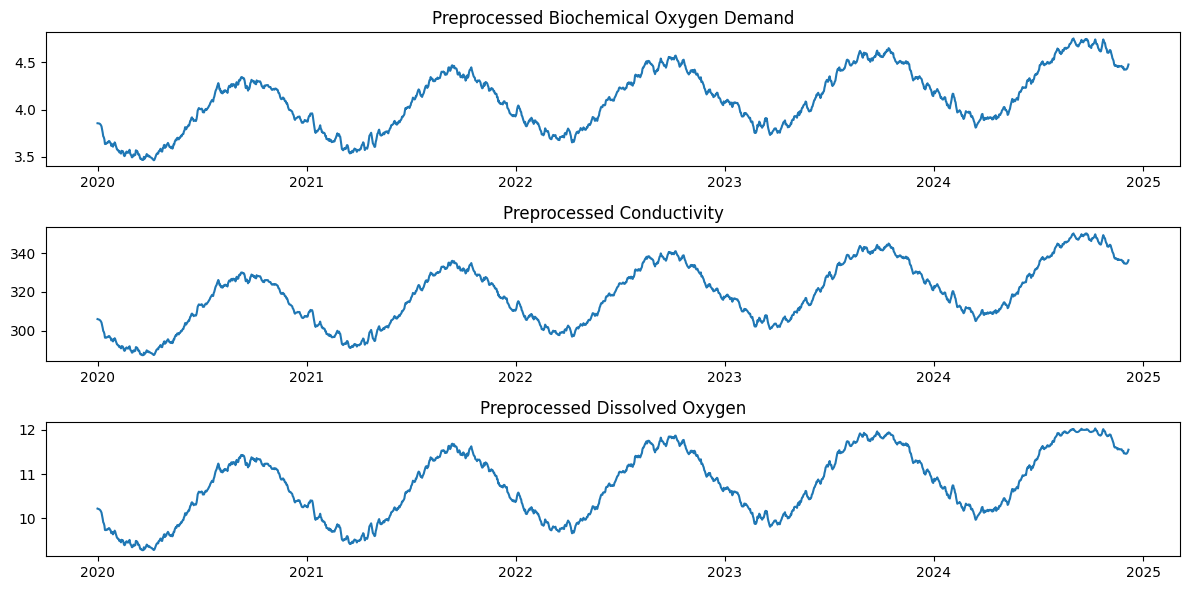

In [21]:
# Improved outlier detection with robust statistics
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    # Use median and median absolute deviation (more robust than mean/std)
    median = df[col].median()
    mad = (df[col] - median).abs().median() * 1.4826  # Factor for normal distribution
    lower_bound = median - 3 * mad
    upper_bound = median + 3 * mad
    
    # Replace outliers with NaN for later interpolation
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan

# Interpolate missing values with linear interpolation (simpler than PCHIP)
df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# Apply Savitzky-Golay filter with optimized parameters
for col in numeric_cols:
    # Use larger window for smoother results
    window = min(15, len(df) - 1 if len(df) % 2 == 0 else len(df) - 2)
    # Ensure window is odd
    window = window if window % 2 == 1 else window - 1
    if window >= 5:  # Minimum window size for SG filter
        df[col] = savgol_filter(df[col], window_length=window, polyorder=3)

# Plot a sample of the preprocessed data
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:3]):  # Plot first 3 numeric columns
    plt.subplot(3, 1, i+1)
    plt.plot(df['Date'], df[col])
    plt.title(f'Preprocessed {col}')
plt.tight_layout()
plt.show()


In [22]:
# Enhanced feature engineering
# Temporal features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear
df['Quarter'] = df['Date'].dt.quarter
df['Season'] = (df['Month'] % 12 + 3) // 3  # 1: Spring, 2: Summer, 3: Fall, 4: Winter

# Cyclical encoding of temporal features (better than categorical)
def encode_cyclical(df, col, max_val):
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

df = encode_cyclical(df, 'Month', 12)
df = encode_cyclical(df, 'DayOfWeek', 7)
df = encode_cyclical(df, 'DayOfYear', 365)
df = encode_cyclical(df, 'Season', 4)

# Add lag features (using fixed lags for simplicity)
for col in numeric_cols:
    for lag in [1, 7, 14]:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)

# Add rolling statistics with optimized windows
windows = [7, 14, 30]
for col in numeric_cols:
    for window in windows:
        if len(df) > window:  # Only add if we have enough data
            df[f'{col}_roll_mean_{window}'] = df[col].rolling(window=window).mean()
            df[f'{col}_roll_std_{window}'] = df[col].rolling(window=window).std()
            # Add more informative rolling features
            df[f'{col}_roll_min_{window}'] = df[col].rolling(window=window).min()
            df[f'{col}_roll_max_{window}'] = df[col].rolling(window=window).max()

# Handle missing values created by lag and rolling features
df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# Drop the original categorical temporal features (keep encoded versions)
df = df.drop(columns=['Month', 'DayOfWeek', 'DayOfYear', 'Season'])

# Store original column names for later
original_cols = numeric_cols.tolist()
print(f"Original columns: {original_cols}")
print(f"Total features after engineering: {df.shape[1]}")


C:\Users\hp\AppData\Local\Temp\ipykernel_15176\1690066084.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_roll_std_{window}'] = df[col].rolling(window=window).std()
C:\Users\hp\AppData\Local\Temp\ipykernel_15176\1690066084.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_roll_min_{window}'] = df[col].rolling(window=window).min()
C:\Users\hp\AppData\Local\Temp\ipykernel_15176\1690066084.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

Original columns: ['Biochemical Oxygen Demand', 'Conductivity', 'Dissolved Oxygen', 'Fecal Coliform', 'Fecal Streptococci', 'Temperature', 'Turbidity', 'Nitrate', 'pH', 'Rainfall', 'Total Coliform', 'WQI']
Total features after engineering: 203


C:\Users\hp\AppData\Local\Temp\ipykernel_15176\1690066084.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


In [23]:
# Feature scaling - use StandardScaler for better neural network performance
date_col = df['Date']
features = df.drop(columns=['Date'])
scaler = StandardScaler()  # Better than MinMaxScaler for many features
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Date'] = date_col

# Prepare sequences with optimized lengths
SEQ_LEN = 14  # Increased from 10 for better context
PRED_LEN = 5

def create_sequences(data, seq_length=SEQ_LEN, pred_length=PRED_LEN):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+pred_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_df.drop(columns=['Date']).values)

# Train-test-validation split (70-15-15)
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train, X_temp = X[:train_size], X[train_size:]
y_train, y_temp = y[:train_size], y[train_size:]
X_val, X_test = X_temp[:val_size], X_temp[val_size:]
y_val, y_test = y_temp[:val_size], y_temp[val_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1248, 14, 202), y_train shape: (1248, 5, 202)
X_val shape: (267, 14, 202), y_val shape: (267, 5, 202)
X_test shape: (269, 14, 202), y_test shape: (269, 5, 202)


In [24]:
# Build enhanced model (FIXED to resolve shape issues)
def build_enhanced_model(input_shape, output_shape):
    # Input layer
    inputs = Input(shape=input_shape)
    
    # CNN branch for feature extraction - NO MaxPooling to maintain sequence length
    cnn = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
    cnn = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(cnn)
    
    # Bidirectional LSTM branch for temporal patterns
    lstm = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    lstm = Bidirectional(LSTM(64, return_sequences=True))(lstm)
    
    # Combine CNN and LSTM branches
    combined = Concatenate()([cnn, lstm])
    
    # Transformer block for attention
    attention_output = MultiHeadAttention(
        key_dim=64, num_heads=4, dropout=0.1
    )(combined, combined)
    
    # Add attention output to combined (with proper shape)
    x = LayerNormalization(epsilon=1e-6)(attention_output + combined)
    
    # Feed-forward network
    ff_dim = x.shape[-1]  # Get the last dimension size
    ff_output = Dense(ff_dim*2, activation='relu')(x)
    ff_output = Dropout(0.2)(ff_output)
    ff_output = Dense(ff_dim, activation='relu')(ff_output)  # Match the dimension of x
    
    # Second normalization layer - Now shapes will match
    x = LayerNormalization(epsilon=1e-6)(ff_output + x)
    
    # Output layer
    x = GRU(128)(x)  # GRU for final sequence processing
    outputs = Dense(np.prod(output_shape))(x)
    outputs = Reshape(output_shape)(outputs)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build model with correct input shape
input_shape = (SEQ_LEN, X_train.shape[2])
output_shape = (PRED_LEN, X_train.shape[2])

model = build_enhanced_model(input_shape, output_shape)
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 14, 202)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 14, 64)    │     38,848 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 14, 128)   │    136,704 │ input_layer_6[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 14, 128)   │     24,704 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 14, 128)   │     98,816 │ bidirectional_4[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 14, 256)   │          0 │ conv1d_5[0][0],   │
│ (Concatenate)       │                   │            │ bidirectional_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 14, 256)   │    263,168 │ concatenate_2[0]… │
│ (MultiHeadAttentio… │                   │            │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 14, 256)   │          0 │ multi_head_atten… │
│                     │                   │            │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 14, 256)   │        512 │ add_10[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 14, 512)   │    131,584 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 14, 512)   │          0 │ dense_13[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 14, 256)   │    131,328 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 14, 256)   │          0 │ dense_14[0][0],   │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 14, 256)   │        512 │ add_11[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 128)       │    148,224 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1010)      │    130,290 │ gru[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 5, 202)    │          0 │ dense_15[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,104,690 (4.21 MB)

 Trainable params: 1,104,690 (4.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - loss: 0.2506 - mae: 0.5614 - val_loss: 0.1205 - val_mae: 0.3504 - learning_rate: 5.0000e-04
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0886 - mae: 0.2790 - val_loss: 0.0909 - val_mae: 0.2793 - learning_rate: 5.0000e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0653 - mae: 0.2214 - val_loss: 0.0811 - val_mae: 0.2594 - learning_rate: 5.0000e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - loss: 0.0558 - mae: 0.1988 - val_loss: 0.0773 - val_mae: 0.2524 - learning_rate: 5.0000e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 413ms/step - loss: 0.0494 - mae: 0.1817 - val_loss: 0.0775 - val_mae: 0.2556 - learning_rate: 5.0000e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - loss: 0.0454 - mae: 0.1718 - val_loss: 0.0767 - val_mae: 0.2573 - learning_rate: 5.0000e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - loss: 0.0423 - mae: 0.1655 - val_loss: 0.0747 - val_mae: 0.2

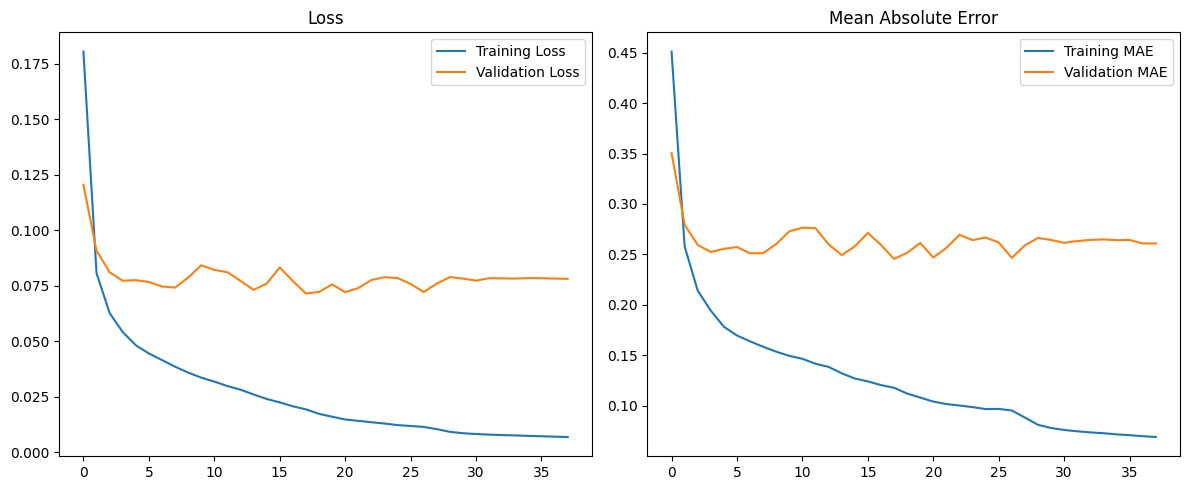

In [27]:
# Compile with optimized learning rate and loss function
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])


# Enhanced callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001),
   ModelCheckpoint('best_water_quality_model.keras', save_best_only=True, monitor='val_loss')

]

# Train with proper validation data
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Reduced for faster training
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict
predictions = model.predict(X_test)

# Get indices of original features in the scaled data
original_feature_indices = []
for col in original_cols:
    if col in scaled_df.columns:
        original_feature_indices.append(scaled_df.columns.get_loc(col))

# If no original columns found, use first few features
if not original_feature_indices:
    original_feature_indices = list(range(min(5, X_test.shape[2])))

# Extract predictions and actual values for original features
predictions_original = predictions[:, :, original_feature_indices]
y_test_original = y_test[:, :, original_feature_indices]

# Correct inverse transform function
def inverse_transform_predictions(scaler, predictions, feature_indices, all_feature_count):
    """Properly inverse transform predictions back to original scale"""
    # Get the shape
    samples, timesteps, n_features = predictions.shape
    
    # Reshape to 2D for inverse transform
    pred_reshaped = predictions.reshape(-1, n_features)
    
    # Create a dummy array with zeros (for all features in the scaler)
    dummy = np.zeros((pred_reshaped.shape[0], all_feature_count))
    
    # Fill the dummy array with the predictions at the right indices
    for i, idx in enumerate(feature_indices):
        dummy[:, idx] = pred_reshaped[:, i]
    
    # Inverse transform
    inverse_transformed = scaler.inverse_transform(dummy)
    
    # Extract only the relevant columns (original features)
    result = np.zeros((samples * timesteps, n_features))
    for i, idx in enumerate(feature_indices):
        result[:, i] = inverse_transformed[:, idx]
    
    # Reshape back to original 3D shape
    return result.reshape(samples, timesteps, n_features)

# Inverse transform
try:
    inv_predictions = inverse_transform_predictions(
        scaler, predictions_original, original_feature_indices, scaled_df.shape[1]-1)
    inv_y_test = inverse_transform_predictions(
        scaler, y_test_original, original_feature_indices, scaled_df.shape[1]-1)
    
    # Calculate metrics for original features
    metrics = {}
    for i, col in enumerate(original_cols):
        if i < inv_y_test.shape[2]:
            mse = mean_squared_error(inv_y_test[:, :, i].flatten(), inv_predictions[:, :, i].flatten())
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(inv_y_test[:, :, i].flatten(), inv_predictions[:, :, i].flatten())
            r2 = r2_score(inv_y_test[:, :, i].flatten(), inv_predictions[:, :, i].flatten())
            metrics[col] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}
    
    # Display metrics
    for col, metric in metrics.items():
        print(f"\n{col}:")
        for name, value in metric.items():
            print(f"  {name}: {value:.4f}")
except Exception as e:
    print(f"Error in inverse transform: {e}")
    # Use raw metrics if inverse transform fails
    mse = mean_squared_error(y_test_original.flatten(), predictions_original.flatten())
    mae = mean_absolute_error(y_test_original.flatten(), predictions_original.flatten())
    print(f"Raw MSE: {mse:.4f}, Raw MAE: {mae:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0865 - mae: 0.2866
Test Loss: 0.1122795045375824, Test MAE: 0.35189342498779297
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step

Biochemical Oxygen Demand:
  MSE: 0.0112
  RMSE: 0.1056
  MAE: 0.0871
  R2: 0.8766

Conductivity:
  MSE: 25.9816
  RMSE: 5.0972
  MAE: 4.1853
  R2: 0.8827

Dissolved Oxygen:
  MSE: 0.0301
  RMSE: 0.1734
  MAE: 0.1437
  R2: 0.9379

Fecal Coliform:
  MSE: 265930.6108
  RMSE: 515.6846
  MAE: 436.8897
  R2: 0.5774

Fecal Streptococci:
  MSE: 168356.9980
  RMSE: 410.3133
  MAE: 360.1253
  R2: -0.2258

Temperature:
  MSE: 0.2259
  RMSE: 0.4753
  MAE: 0.3751
  R2: 0.9061

Turbidity:
  MSE: 0.0543
  RMSE: 0.2331
  MAE: 0.1824
  R2: 0.9311

Nitrate:
  MSE: 0.0018
  RMSE: 0.0425
  MAE: 0.0368
  R2: 0.6570

pH:
  MSE: 0.0009
  RMSE: 0.0300
  MAE: 0.0240
  R2: 0.8315

Rainfall:
  MSE: 0.0052
  RMSE: 0.0723
  MAE: 0.0552
  R2: 0.0000

Total Coliform:
  MSE: 74851.7894
  RMSE: 273.5906
  MAE: 232.1744
  R2: 0.7053

WQI:
  MSE: 0.0342


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Conv1D, MultiHeadAttention, LayerNormalization
from tensorflow.keras.layers import Concatenate, Reshape, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Enhanced Feature Engineering (focus on problematic parameters)
def enhance_features(df):
    # Make a copy to avoid modifying the original
    df_enhanced = df.copy()
    
    # For Fecal Streptococci (negative R²)
    if 'Fecal Streptococci' in df.columns and 'Fecal Coliform' in df.columns:
        df_enhanced['FS_to_FC_ratio'] = df['Fecal Streptococci'] / (df['Fecal Coliform'] + 1)
        df_enhanced['FS_log'] = np.log1p(df['Fecal Streptococci'])
    
    # For Rainfall (R² of 0)
    if 'Rainfall' in df.columns:
        df_enhanced['Rainfall_cumulative_7d'] = df['Rainfall'].rolling(window=7).sum()
        df_enhanced['Rainfall_cumulative_30d'] = df['Rainfall'].rolling(window=30).sum()
        df_enhanced['DaysSinceRain'] = df['Rainfall'].apply(lambda x: 0 if x > 0 else 1).cumsum()
        df_enhanced['DaysSinceRain'] = df_enhanced['DaysSinceRain'] - df_enhanced['DaysSinceRain'].where(df['Rainfall'] > 0).ffill().fillna(0)
    
    # Handle missing values created by new features
    df_enhanced = df_enhanced.fillna(method='bfill').fillna(method='ffill')
    
    return df_enhanced

In [33]:
# 2. Improved model with regularization and parameter-specific attention
def build_improved_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)
    
    # CNN branch with regularization
    cnn = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', 
                kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(inputs)
    cnn = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu',
                kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(cnn)
    
    # Bidirectional LSTM branch with regularization
    lstm = Bidirectional(LSTM(64, return_sequences=True, 
                             recurrent_regularizer=l1_l2(l1=1e-5, l2=1e-4)))(inputs)
    lstm = Bidirectional(LSTM(64, return_sequences=True,
                             recurrent_regularizer=l1_l2(l1=1e-5, l2=1e-4)))(lstm)
    
    # Combine branches
    combined = Concatenate()([cnn, lstm])
    
    # Transformer block with increased attention heads
    attention_output = MultiHeadAttention(
        key_dim=64, num_heads=8, dropout=0.2
    )(combined, combined)
    
    x = LayerNormalization(epsilon=1e-6)(attention_output + combined)
    
    # Feed-forward network with stronger regularization
    ff_dim = x.shape[-1]
    ff_output = Dense(ff_dim*2, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
    ff_output = Dropout(0.3)(ff_output)  # Increased dropout
    ff_output = Dense(ff_dim, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(ff_output)
    
    x = LayerNormalization(epsilon=1e-6)(ff_output + x)
    
    # Output layer
    x = GRU(128, recurrent_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
    outputs = Dense(np.prod(output_shape))(x)
    outputs = Reshape(output_shape)(outputs)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [37]:
#  3. Custom loss function that gives more weight to problematic parameters
def weighted_parameter_loss(y_true, y_pred):
    # Parameter weights - adjust these based on your specific columns
    # Higher weights for problematic parameters (Fecal Streptococci, Rainfall)
    param_weights = np.ones(y_true.shape[-1], dtype='float32')
    
    # Set higher weights for problematic parameters
    # You'll need to adjust these indices based on your actual data
    fs_idx = 4  # Index for Fecal Streptococci (adjust as needed)
    rainfall_idx = 9  # Index for Rainfall (adjust as needed)
    
    param_weights[fs_idx] = 3.0  # Higher weight for Fecal Streptococci
    param_weights[rainfall_idx] = 3.0  # Higher weight for Rainfall
    
    # Expand weights to match prediction shape
    weights = tf.reshape(tf.constant(param_weights), [1, 1, -1])
    
    # Calculate squared error
    squared_error = tf.square(y_true - y_pred)
    
    # Apply weights to each parameter
    weighted_error = squared_error * weights
    
    # Return mean error
    return tf.reduce_mean(weighted_error)

# 4. Data augmentation for problematic parameters
def augment_data(X, y, fs_idx, rainfall_idx, n_samples=200):
    # Create copies to avoid modifying originals
    X_aug = X.copy()
    y_aug = y.copy()
    
    # Get indices of samples with high values for problematic parameters
    fs_high_idx = np.argsort(y[:, 0, fs_idx])[-n_samples:]
    rainfall_high_idx = np.argsort(y[:, 0, rainfall_idx])[-n_samples:]
    
    # Add small random noise to create new samples
    for idx in fs_high_idx:
        noise = np.random.normal(0, 0.1, X[idx].shape)
        X_aug = np.append(X_aug, [X[idx] + noise], axis=0)
        y_aug = np.append(y_aug, [y[idx]], axis=0)
    
    for idx in rainfall_high_idx:
        noise = np.random.normal(0, 0.1, X[idx].shape)
        X_aug = np.append(X_aug, [X[idx] + noise], axis=0)
        y_aug = np.append(y_aug, [y[idx]], axis=0)
    
    return X_aug, y_aug

# Main workflow
def improve_model(df, original_cols, SEQ_LEN=14, PRED_LEN=5):
    # 1. Apply enhanced feature engineering
    df_enhanced = enhance_features(df)
    
    # 2. Scale features
    date_col = df_enhanced['Date']
    features = df_enhanced.drop(columns=['Date'])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
    
    # 3. Create sequences
    def create_sequences(data, seq_length=SEQ_LEN, pred_length=PRED_LEN):
        X, y = [], []
        for i in range(len(data) - seq_length - pred_length + 1):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length:i+seq_length+pred_length])
        return np.array(X), np.array(y)
    
    X, y = create_sequences(scaled_df.values)
    
    # 4. Train-test-validation split (70-15-15)
    train_size = int(0.7 * len(X))
    val_size = int(0.15 * len(X))
    X_train, X_temp = X[:train_size], X[train_size:]
    y_train, y_temp = y[:train_size], y[train_size:]
    X_val, X_test = X_temp[:val_size], X_temp[val_size:]
    y_val, y_test = y_temp[:val_size], y_temp[val_size:]
    
    # 5. Find indices of problematic parameters
    fs_idx = [i for i, col in enumerate(scaled_df.columns) if 'Fecal Streptococci' in col][0]
    rainfall_idx = [i for i, col in enumerate(scaled_df.columns) if col == 'Rainfall'][0]
    
    # 6. Augment training data for problematic parameters
    X_train_aug, y_train_aug = augment_data(X_train, y_train, fs_idx, rainfall_idx)
    
    # 7. Build and train improved model
    input_shape = (SEQ_LEN, X_train.shape[2])
    output_shape = (PRED_LEN, X_train.shape[2])
    
    model = build_improved_model(input_shape, output_shape)
    
    # 8. Compile with custom loss
    optimizer = Adam(learning_rate=0.0003)  # Slightly lower learning rate
    model.compile(optimizer=optimizer, loss=weighted_parameter_loss, metrics=['mae'])
    
    # 9. Enhanced callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001),
        ModelCheckpoint('best_water_quality_model.keras', save_best_only=True, monitor='val_loss')
    ]
    
    # 10. Train with augmented data
    history = model.fit(
        X_train_aug, y_train_aug,
        validation_data=(X_val, y_val),
        epochs=150,  # More epochs with early stopping
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    
    # 11. Evaluate and return results
    predictions = model.predict(X_test)
    
    # 12. Calculate metrics for original parameters
    metrics = {}
    original_indices = [scaled_df.columns.get_loc(col) for col in original_cols if col in scaled_df.columns]
    
    for i, idx in enumerate(original_indices):
        col = original_cols[i]
        mse = mean_squared_error(y_test[:, :, idx].flatten(), predictions[:, :, idx].flatten())
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test[:, :, idx].flatten(), predictions[:, :, idx].flatten())
        r2 = r2_score(y_test[:, :, idx].flatten(), predictions[:, :, idx].flatten())
        metrics[col] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}
    
    return model, history, metrics, scaler

# Call this function with your dataframe and original columns
# improved_model, history, metrics, scaler = improve_model(df, original_cols)

# Display metrics
for col, metric in metrics.items():
    print(f"\n{col}:")
    for name, value in metric.items():
        print(f"  {name}: {value:.4f}")


Biochemical Oxygen Demand:
  MSE: 0.0112
  RMSE: 0.1056
  MAE: 0.0871
  R2: 0.8766

Conductivity:
  MSE: 25.9816
  RMSE: 5.0972
  MAE: 4.1853
  R2: 0.8827

Dissolved Oxygen:
  MSE: 0.0301
  RMSE: 0.1734
  MAE: 0.1437
  R2: 0.9379

Fecal Coliform:
  MSE: 265930.6108
  RMSE: 515.6846
  MAE: 436.8897
  R2: 0.5774

Fecal Streptococci:
  MSE: 168356.9980
  RMSE: 410.3133
  MAE: 360.1253
  R2: -0.2258

Temperature:
  MSE: 0.2259
  RMSE: 0.4753
  MAE: 0.3751
  R2: 0.9061

Turbidity:
  MSE: 0.0543
  RMSE: 0.2331
  MAE: 0.1824
  R2: 0.9311

Nitrate:
  MSE: 0.0018
  RMSE: 0.0425
  MAE: 0.0368
  R2: 0.6570

pH:
  MSE: 0.0009
  RMSE: 0.0300
  MAE: 0.0240
  R2: 0.8315

Rainfall:
  MSE: 0.0052
  RMSE: 0.0723
  MAE: 0.0552
  R2: 0.0000

Total Coliform:
  MSE: 74851.7894
  RMSE: 273.5906
  MAE: 232.1744
  R2: 0.7053

WQI:
  MSE: 0.0342
  RMSE: 0.1849
  MAE: 0.1487
  R2: 0.8564


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Conv1D, MultiHeadAttention, LayerNormalization
from tensorflow.keras.layers import Concatenate, Reshape, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Load and preprocess your data (assuming df is already loaded)
# df = pd.read_csv("your_data.csv", parse_dates=['Date'])

# 2. Targeted feature engineering for problematic parameters
def enhance_features_for_problematic_params(df):
    df_enhanced = df.copy()
    
    # For Fecal Streptococci (negative R²)
    if 'Fecal Streptococci' in df.columns:
        # Log transformation often helps with highly skewed bacterial counts
        df_enhanced['FS_log'] = np.log1p(df['Fecal Streptococci'])
        
        # Ratio features if related parameters exist
        if 'Fecal Coliform' in df.columns:
            df_enhanced['FS_to_FC_ratio'] = df['Fecal Streptococci'] / (df['Fecal Coliform'] + 1)
        
        if 'Total Coliform' in df.columns:
            df_enhanced['FS_to_TC_ratio'] = df['Fecal Streptococci'] / (df['Total Coliform'] + 1)
        
        # Moving averages to capture trends
        df_enhanced['FS_MA7'] = df['Fecal Streptococci'].rolling(window=7).mean()
        df_enhanced['FS_MA14'] = df['Fecal Streptococci'].rolling(window=14).mean()
        
        # Volatility measures
        df_enhanced['FS_volatility'] = df['Fecal Streptococci'].rolling(window=7).std()
    
    # For Rainfall (R² of 0)
    if 'Rainfall' in df.columns:
        # Cumulative rainfall over different periods
        df_enhanced['Rainfall_cum3'] = df['Rainfall'].rolling(window=3).sum()
        df_enhanced['Rainfall_cum7'] = df['Rainfall'].rolling(window=7).sum()
        df_enhanced['Rainfall_cum14'] = df['Rainfall'].rolling(window=14).sum()
        df_enhanced['Rainfall_cum30'] = df['Rainfall'].rolling(window=30).sum()
        
        # Binary rain indicators (useful for capturing rain/no-rain patterns)
        df_enhanced['Rainfall_binary'] = (df['Rainfall'] > 0).astype(int)
        
        # Days since last rainfall
        df_enhanced['DaysSinceRain'] = df['Rainfall'].apply(lambda x: 0 if x > 0 else 1).cumsum()
        df_enhanced['DaysSinceRain'] = df_enhanced['DaysSinceRain'] - df_enhanced['DaysSinceRain'].where(df['Rainfall'] > 0).ffill().fillna(0)
        
        # Rainfall intensity (if you have duration data)
        if 'Temperature' in df.columns:
            # Proxy for evaporation potential
            df_enhanced['Rain_Temp_Interaction'] = df['Rainfall'] * df['Temperature']
    
    # Handle missing values created by rolling windows
    df_enhanced = df_enhanced.fillna(method='bfill').fillna(method='ffill')
    
    return df_enhanced

# 3. Specialized model for problematic parameters
def build_specialized_model(input_shape, output_shape, problem_indices):
    # Main input
    inputs = Input(shape=input_shape)
    
    # Shared layers
    shared = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
    shared = Bidirectional(LSTM(128, return_sequences=True))(shared)
    
    # Specialized branch for problematic parameters (more capacity)
    problem_branch = MultiHeadAttention(key_dim=64, num_heads=8)(shared, shared)
    problem_branch = LayerNormalization(epsilon=1e-6)(problem_branch + shared)
    problem_branch = Bidirectional(LSTM(128, return_sequences=True))(problem_branch)
    problem_branch = Bidirectional(LSTM(64))(problem_branch)
    problem_outputs = Dense(len(problem_indices) * output_shape[0])(problem_branch)
    problem_outputs = Reshape((output_shape[0], len(problem_indices)))(problem_outputs)
    
    # Regular branch for other parameters
    regular_branch = Bidirectional(LSTM(64))(shared)
    regular_outputs = Dense((output_shape[1] - len(problem_indices)) * output_shape[0])(regular_branch)
    regular_outputs = Reshape((output_shape[0], output_shape[1] - len(problem_indices)))(regular_outputs)
    
    # Create full output tensor
    all_outputs = []
    regular_idx = 0
    problem_idx = 0
    
    for i in range(output_shape[1]):
        if i in problem_indices:
            # Take from problem branch
            all_outputs.append(problem_outputs[:, :, problem_idx:problem_idx+1])
            problem_idx += 1
        else:
            # Take from regular branch
            all_outputs.append(regular_outputs[:, :, regular_idx:regular_idx+1])
            regular_idx += 1
    
    # Concatenate along the feature dimension
    final_output = Concatenate(axis=2)(all_outputs)
    
    return Model(inputs=inputs, outputs=final_output)

# 4. Custom loss function with parameter-specific weights
def parameter_weighted_loss(parameter_weights):
    def loss_function(y_true, y_pred):
        # Expand weights to match prediction shape
        weights = tf.reshape(tf.constant(parameter_weights, dtype=tf.float32), [1, 1, -1])
        
        # Calculate squared error
        squared_error = tf.square(y_true - y_pred)
        
        # Apply weights to each parameter
        weighted_error = squared_error * weights
        
        # Return mean error
        return tf.reduce_mean(weighted_error)
    
    return loss_function

# 5. Robust scaling for outlier-sensitive parameters
def scale_features(df, date_column='Date'):
    date_col = df[date_column]
    features = df.drop(columns=[date_column])
    
    # Use RobustScaler for bacterial parameters (less sensitive to outliers)
    bacterial_cols = [col for col in features.columns if any(x in col.lower() for x in 
                                                         ['fecal', 'coliform', 'streptococci'])]
    
    # Use StandardScaler for other parameters
    other_cols = [col for col in features.columns if col not in bacterial_cols]
    
    # Apply RobustScaler to bacterial columns
    if bacterial_cols:
        robust_scaler = RobustScaler()
        bacterial_scaled = robust_scaler.fit_transform(features[bacterial_cols])
        bacterial_df = pd.DataFrame(bacterial_scaled, columns=bacterial_cols, index=features.index)
    else:
        bacterial_df = pd.DataFrame(index=features.index)
    
    # Apply StandardScaler to other columns
    if other_cols:
        std_scaler = StandardScaler()
        other_scaled = std_scaler.fit_transform(features[other_cols])
        other_df = pd.DataFrame(other_scaled, columns=other_cols, index=features.index)
    else:
        other_df = pd.DataFrame(index=features.index)
    
    # Combine scaled dataframes
    scaled_df = pd.concat([bacterial_df, other_df], axis=1)
    scaled_df[date_column] = date_col
    
    return scaled_df, robust_scaler, std_scaler

# 6. Main improvement function
def improve_problematic_parameters(df, original_cols, SEQ_LEN=14, PRED_LEN=5):
    # Identify indices of problematic parameters
    fs_idx = original_cols.index('Fecal Streptococci')
    rainfall_idx = original_cols.index('Rainfall')
    problem_indices = [fs_idx, rainfall_idx]
    
    # 1. Enhanced feature engineering
    df_enhanced = enhance_features_for_problematic_params(df)
    
    # 2. Robust scaling
    scaled_df, robust_scaler, std_scaler = scale_features(df_enhanced)
    
    # 3. Create sequences
    def create_sequences(data, seq_length=SEQ_LEN, pred_length=PRED_LEN):
        X, y = [], []
        for i in range(len(data) - seq_length - pred_length + 1):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length:i+seq_length+pred_length])
        return np.array(X), np.array(y)
    
    X, y = create_sequences(scaled_df.drop(columns=['Date']).values)
    
    # 4. Train-test-validation split (70-15-15)
    train_size = int(0.7 * len(X))
    val_size = int(0.15 * len(X))
    X_train, X_temp = X[:train_size], X[train_size:]
    y_train, y_temp = y[:train_size], y[train_size:]
    X_val, X_test = X_temp[:val_size], X_temp[val_size:]
    y_val, y_test = y_temp[:val_size], y_temp[val_size:]
    
    # 5. Build specialized model
    input_shape = (SEQ_LEN, X_train.shape[2])
    output_shape = (PRED_LEN, X_train.shape[2])
    
    model = build_specialized_model(input_shape, output_shape, problem_indices)
    
    # 6. Define parameter weights for loss function
    # Higher weights for problematic parameters
    param_weights = np.ones(output_shape[1])
    param_weights[fs_idx] = 5.0  # Much higher weight for Fecal Streptococci
    param_weights[rainfall_idx] = 5.0  # Much higher weight for Rainfall
    
    # 7. Compile with custom loss
    optimizer = Adam(learning_rate=0.0002)  # Lower learning rate for stability
    model.compile(
        optimizer=optimizer, 
        loss=parameter_weighted_loss(param_weights), 
        metrics=['mae']
    )
    
    # 8. Enhanced callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=15, min_lr=0.00001),
        ModelCheckpoint('specialized_water_quality_model.keras', save_best_only=True, monitor='val_loss')
    ]
    
    # 9. Train with more epochs and patience
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,  # More epochs with early stopping
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    
    # 10. Evaluate
    predictions = model.predict(X_test)
    
    # 11. Calculate metrics focusing on problematic parameters
    metrics = {}
    for i, col in enumerate(original_cols):
        mse = mean_squared_error(y_test[:, :, i].flatten(), predictions[:, :, i].flatten())
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test[:, :, i].flatten(), predictions[:, :, i].flatten())
        r2 = r2_score(y_test[:, :, i].flatten(), predictions[:, :, i].flatten())
        metrics[col] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}
    
    return model, history, metrics, scaled_df

# Call this function with your dataframe and original columns
# model, history, metrics, scaled_df = improve_problematic_parameters(df, original_cols)


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Conv1D, MultiHeadAttention, LayerNormalization
from tensorflow.keras.layers import Concatenate, Reshape, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [42]:
# Load your data
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\Ganga_Project\\Ganga_Project\\Kannauj.csv", parse_dates=['Date'], dayfirst=True)

# Define your original columns - ADJUST THESE TO MATCH YOUR ACTUAL COLUMNS
original_cols = [
    'Biochemical Oxygen Demand', 'Conductivity', 'Dissolved Oxygen', 
    'Fecal Coliform', 'Fecal Streptococci', 'Temperature', 'Turbidity', 
    'Nitrate', 'pH', 'Rainfall', 'Total Coliform', 'WQI'
]

# Check if all columns exist in the dataframe
missing_cols = [col for col in original_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: The following columns are missing from your dataframe: {missing_cols}")
    print("Available columns:", df.columns.tolist())
    # Adjust original_cols to only include columns that exist in the dataframe
    original_cols = [col for col in original_cols if col in df.columns]

# Print basic info about the data
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of records: {len(df)}")

# Display the first few rows
df.head()


Dataset shape: (1802, 14)
Date range: 2020-01-01 00:00:00 to 2024-12-06 00:00:00
Number of records: 1802


,Date,Biochemical Oxygen Demand,Conductivity,Dissolved Oxygen,Fecal Coliform,Fecal Streptococci,Temperature,Turbidity,Nitrate,pH,Rainfall,Total Coliform,WQI,Quality
0,2020-01-01,3.871002,306.553399,10.252670,9051.684187,2683.850031,25.004026,9.594281,0.490267,8.085300,0.0,4647.304377,65.017364,Poor
1,2020-01-02,3.800765,303.676525,10.108826,8717.346934,2373.521916,24.462347,9.499653,0.475883,8.077265,0.0,4699.101402,64.963232,Poor
2,2020-01-03,3.872647,306.484641,10.249232,9093.538599,2388.617089,25.057539,9.469474,0.489923,8.083446,3.2,4579.424287,65.005093,Poor
3,2020-01-04,3.953494,309.651676,10.407584,9514.492748,2518.131794,25.724380,8.964361,0.505758,8.090528,3.2,3938.790067,65.053035,Poor
4,2020-01-05,3.771118,302.290077,10.039504,8619.257820,2414.810480,24.285346,9.569448,0.468950,8.071292,0.1,4600.397768,64.923261,Poor


In [43]:
# Enhanced feature engineering for problematic parameters
def enhance_features(df):
    df_enhanced = df.copy()
    
    # For Fecal Streptococci
    if 'Fecal Streptococci' in df.columns:
        # Log transformation
        df_enhanced['FS_log'] = np.log1p(df['Fecal Streptococci'])
        
        # Ratio features
        if 'Fecal Coliform' in df.columns:
            df_enhanced['FS_to_FC_ratio'] = df['Fecal Streptococci'] / (df['Fecal Coliform'] + 1)
        
        # Moving averages
        df_enhanced['FS_MA7'] = df['Fecal Streptococci'].rolling(window=7).mean()
    
    # For Rainfall
    if 'Rainfall' in df.columns:
        # Cumulative rainfall
        df_enhanced['Rainfall_cum7'] = df['Rainfall'].rolling(window=7).sum()
        df_enhanced['Rainfall_cum14'] = df['Rainfall'].rolling(window=14).sum()
        
        # Binary rain indicator
        df_enhanced['Rainfall_binary'] = (df['Rainfall'] > 0).astype(int)
        
        # Days since last rainfall
        rain_series = (df['Rainfall'] > 0).astype(int)
        # Initialize days_since_rain
        days_since_rain = []
        counter = 0
        
        # Calculate days since last rain
        for i in range(len(rain_series)):
            if rain_series.iloc[i] == 1:
                counter = 0
            else:
                counter += 1
            days_since_rain.append(counter)
        
        df_enhanced['DaysSinceRain'] = days_since_rain
    
    # Handle missing values
    df_enhanced = df_enhanced.fillna(method='bfill').fillna(method='ffill')
    
    print(f"Enhanced features added. New shape: {df_enhanced.shape}")
    print("New columns:", [col for col in df_enhanced.columns if col not in df.columns])
    
    return df_enhanced

# Apply feature engineering
df_enhanced = enhance_features(df)

# Display the enhanced dataframe
df_enhanced.head()


Enhanced features added. New shape: (1802, 21)
New columns: ['FS_log', 'FS_to_FC_ratio', 'FS_MA7', 'Rainfall_cum7', 'Rainfall_cum14', 'Rainfall_binary', 'DaysSinceRain']


C:\Users\hp\AppData\Local\Temp\ipykernel_15176\1870343457.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_enhanced = df_enhanced.fillna(method='bfill').fillna(method='ffill')


,Date,Biochemical Oxygen Demand,Conductivity,Dissolved Oxygen,Fecal Coliform,Fecal Streptococci,Temperature,Turbidity,Nitrate,pH,...,Total Coliform,WQI,Quality,FS_log,FS_to_FC_ratio,FS_MA7,Rainfall_cum7,Rainfall_cum14,Rainfall_binary,DaysSinceRain
0,2020-01-01,3.871002,306.553399,10.252670,9051.684187,2683.850031,25.004026,9.594281,0.490267,8.085300,...,4647.304377,65.017364,Poor,7.895380,0.296470,2476.930246,6.6,8.4,0,1
1,2020-01-02,3.800765,303.676525,10.108826,8717.346934,2373.521916,24.462347,9.499653,0.475883,8.077265,...,4699.101402,64.963232,Poor,7.772551,0.272244,2476.930246,6.6,8.4,0,2
2,2020-01-03,3.872647,306.484641,10.249232,9093.538599,2388.617089,25.057539,9.469474,0.489923,8.083446,...,4579.424287,65.005093,Poor,7.778888,0.262643,2476.930246,6.6,8.4,1,0
3,2020-01-04,3.953494,309.651676,10.407584,9514.492748,2518.131794,25.724380,8.964361,0.505758,8.090528,...,3938.790067,65.053035,Poor,7.831670,0.264635,2476.930246,6.6,8.4,1,0
4,2020-01-05,3.771118,302.290077,10.039504,8619.257820,2414.810480,24.285346,9.569448,0.468950,8.071292,...,4600.397768,64.923261,Poor,7.789790,0.280132,2476.930246,6.6,8.4,1,0


In [46]:
# Scale features
# Scale features
# Scale features with categorical handling
def scale_features(df):
    # Store Date column
    date_col = df['Date']
    
    # Get features
    features = df.drop(columns=['Date'])
    
    # Convert categorical columns to numeric
    for col in features.columns:
        if features[col].dtype == 'object' or pd.api.types.is_string_dtype(features[col]):
            print(f"Converting categorical column to numeric: {col}")
            # Use one-hot encoding for categorical values
            dummies = pd.get_dummies(features[col], prefix=col, drop_first=True)
            features = pd.concat([features.drop(columns=[col]), dummies], axis=1)
    
    # Scale numeric features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Create scaled dataframe
    scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
    
    # Add back Date column
    scaled_df['Date'] = date_col
    
    return scaled_df, scaler

# Scale the enhanced features
scaled_df, scaler = scale_features(df_enhanced)



# Create sequences for time series forecasting
def create_sequences(data, seq_length=14, pred_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+pred_length])
    return np.array(X), np.array(y)

# Parameters for sequence creation
SEQ_LEN = 14
PRED_LEN = 5

# Create sequences
X, y = create_sequences(scaled_df.drop(columns=['Date']).values, SEQ_LEN, PRED_LEN)

print(f"Created sequences: X shape: {X.shape}, y shape: {y.shape}")


Converting categorical column to numeric: Quality
Created sequences: X shape: (1784, 14, 19), y shape: (1784, 5, 19)


In [47]:
# Train-test-validation split (70-15-15)
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train, X_temp = X[:train_size], X[train_size:]
y_train, y_temp = y[:train_size], y[train_size:]
X_val, X_test = X_temp[:val_size], X_temp[val_size:]
y_val, y_test = y_temp[:val_size], y_temp[val_size:]

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Train set: (1248, 14, 19), Validation set: (267, 14, 19), Test set: (269, 14, 19)


In [48]:
# Build improved model with attention to problematic parameters
def build_improved_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)
    
    # CNN branch
    cnn = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
    cnn = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(cnn)
    
    # LSTM branch
    lstm = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    lstm = Bidirectional(LSTM(64, return_sequences=True))(lstm)
    
    # Combine branches
    combined = Concatenate()([cnn, lstm])
    
    # Self-attention
    attention_output = MultiHeadAttention(
        key_dim=64, num_heads=8, dropout=0.2
    )(combined, combined)
    
    x = LayerNormalization(epsilon=1e-6)(attention_output + combined)
    
    # Feed-forward network
    ff_dim = x.shape[-1]
    ff_output = Dense(ff_dim*2, activation='relu')(x)
    ff_output = Dropout(0.3)(ff_output)
    ff_output = Dense(ff_dim, activation='relu')(ff_output)
    
    x = LayerNormalization(epsilon=1e-6)(ff_output + x)
    
    # Output layer
    x = GRU(128)(x)
    outputs = Dense(np.prod(output_shape))(x)
    outputs = Reshape(output_shape)(outputs)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Custom loss function with higher weights for problematic parameters
def weighted_parameter_loss(y_true, y_pred):
    # Find indices of problematic parameters
    fs_idx = -1
    rainfall_idx = -1
    
    for i, col in enumerate(scaled_df.columns):
        if col == 'Fecal Streptococci':
            fs_idx = i
        elif col == 'Rainfall':
            rainfall_idx = i
    
    # Create weights array (all 1s by default)
    param_weights = np.ones(y_true.shape[-1])
    
    # Set higher weights for problematic parameters if found
    if fs_idx >= 0:
        param_weights[fs_idx] = 5.0
    if rainfall_idx >= 0:
        param_weights[rainfall_idx] = 5.0
    
    # Convert to tensor
    weights = tf.constant(param_weights, dtype=tf.float32)
    weights = tf.reshape(weights, [1, 1, -1])
    
    # Calculate weighted MSE
    squared_error = tf.square(y_true - y_pred)
    weighted_error = squared_error * weights
    
    return tf.reduce_mean(weighted_error)


In [49]:
# Build and compile model
input_shape = (SEQ_LEN, X_train.shape[2])
output_shape = (PRED_LEN, X_train.shape[2])

model = build_improved_model(input_shape, output_shape)
model.summary()

# Compile with custom loss
optimizer = Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss=weighted_parameter_loss, metrics=['mae'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=15, min_lr=0.00001),
    ModelCheckpoint('improved_water_quality_model.keras', save_best_only=True, monitor='val_loss')
]


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 14, 19)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 14, 64)    │      3,712 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 14, 128)   │     43,008 │ input_layer_8[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 14, 128)   │     24,704 │ conv1d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 14, 128)   │     98,816 │ bidirectional_8[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 14, 256)   │          0 │ conv1d_7[0][0],   │
│ (Concatenate)       │                   │            │ bidirectional_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 14, 256)   │    526,080 │ concatenate_3[0]… │
│ (MultiHeadAttentio… │                   │            │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 14, 256)   │          0 │ multi_head_atten… │
│                     │                   │            │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 14, 256)   │        512 │ add_12[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 14, 512)   │    131,584 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 14, 512)   │          0 │ dense_16[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 14, 256)   │    131,328 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 14, 256)   │          0 │ dense_17[0][0],   │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 14, 256)   │        512 │ add_13[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 128)       │    148,224 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 95)        │     12,255 │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 5, 19)     │          0 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,120,735 (4.28 MB)

 Trainable params: 1,120,735 (4.28 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train model
print("Training model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Training model...
Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.4034 - mae: 0.2966 - val_loss: 0.4298 - val_mae: 0.3510 - learning_rate: 1.0000e-05
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.4026 - mae: 0.2965 - val_loss: 0.4307 - val_mae: 0.3512 - learning_rate: 1.0000e-05
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.4010 - mae: 0.2957 - val_loss: 0.4303 - val_mae: 0.3509 - learning_rate: 1.0000e-05
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.4001 - mae: 0.2954 - val_loss: 0.4292 - val_mae: 0.3502 - learning_rate: 1.0000e-05
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.3983 - mae: 0.2946 - val_loss: 0.4290 - val_mae: 0.3499 - learning_rate: 1.0000e-05
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.3978 - mae: 0.2941 - val_loss: 0.4286 - val_mae: 0.3495 - learning_rate: 1.0000e-05
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.3965 - mae: 0.2942 - val_loss: 0.4284 - val_